In [45]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [46]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [47]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [48]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [49]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [50]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
2,5.0 out of 5 stars\n.,5.0,It has a great quality and the built features ...,Reviewed in India on 22 January 2024
3,5.0 out of 5 stars\nGood looking,5.0,Nice product,Reviewed in India on 27 January 2024
4,4.0 out of 5 stars\nMore than what you pay for,4.0,I have received this product a couple of days ...,Reviewed in India on 7 May 2022
...,...,...,...,...
105,3.0 out of 5 stars\nCharging issues,3.0,Changer cannot connects every time... It could...,Reviewed in India on 10 December 2023
106,3.0 out of 5 stars\nOk,3.0,Ok good but I not get prime video account,Reviewed in India on 9 December 2023
107,5.0 out of 5 stars\nGood Product and worth,5.0,Good Product. value for money,Reviewed in India on 9 January 2024
108,4.0 out of 5 stars\nbeautiful very nice...miss...,4.0,beautiful very nice...missing body temperature...,Reviewed in India on 13 September 2023


In [51]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [52]:
df.head(50)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\n.,5.0,It has a great quality and the built features ...,22 January 2024
3,5.0 out of 5 stars\nGood looking,5.0,Nice product,27 January 2024
4,4.0 out of 5 stars\nMore than what you pay for,4.0,I have received this product a couple of days ...,7 May 2022
5,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023
6,5.0 out of 5 stars\nVery nice prdt 👍,5.0,Watch looks very elegant. I love wearing this ...,17 January 2024
7,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023
8,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
9,4.0 out of 5 stars\nGood watch wake gaster is ...,4.0,Only two problem.1 not remove main watch face ...,2 February 2024


In [53]:
df.to_csv("BoatSmartWatch_Review.csv")

In [54]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\n.,5.0,It has a great quality and the built features ...,22 January 2024
3,5.0 out of 5 stars\nGood looking,5.0,Nice product,27 January 2024
4,4.0 out of 5 stars\nMore than what you pay for,4.0,I have received this product a couple of days ...,7 May 2022
...,...,...,...,...
105,3.0 out of 5 stars\nCharging issues,3.0,Changer cannot connects every time... It could...,10 December 2023
106,3.0 out of 5 stars\nOk,3.0,Ok good but I not get prime video account,9 December 2023
107,5.0 out of 5 stars\nGood Product and worth,5.0,Good Product. value for money,9 January 2024
108,4.0 out of 5 stars\nbeautiful very nice...miss...,4.0,beautiful very nice...missing body temperature...,13 September 2023


In [55]:
reviews.Rating.describe()

count    110.000000
mean       4.045455
std        0.655063
min        2.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [56]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       108 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [57]:
reviews.isna().sum()

Title          0
Rating         0
Review         2
Review_Date    0
dtype: int64

In [58]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\n.,5.0,It has a great quality and the built features ...,22 January 2024
3,5.0 out of 5 stars\nGood looking,5.0,Nice product,27 January 2024
4,4.0 out of 5 stars\nMore than what you pay for,4.0,I have received this product a couple of days ...,7 May 2022


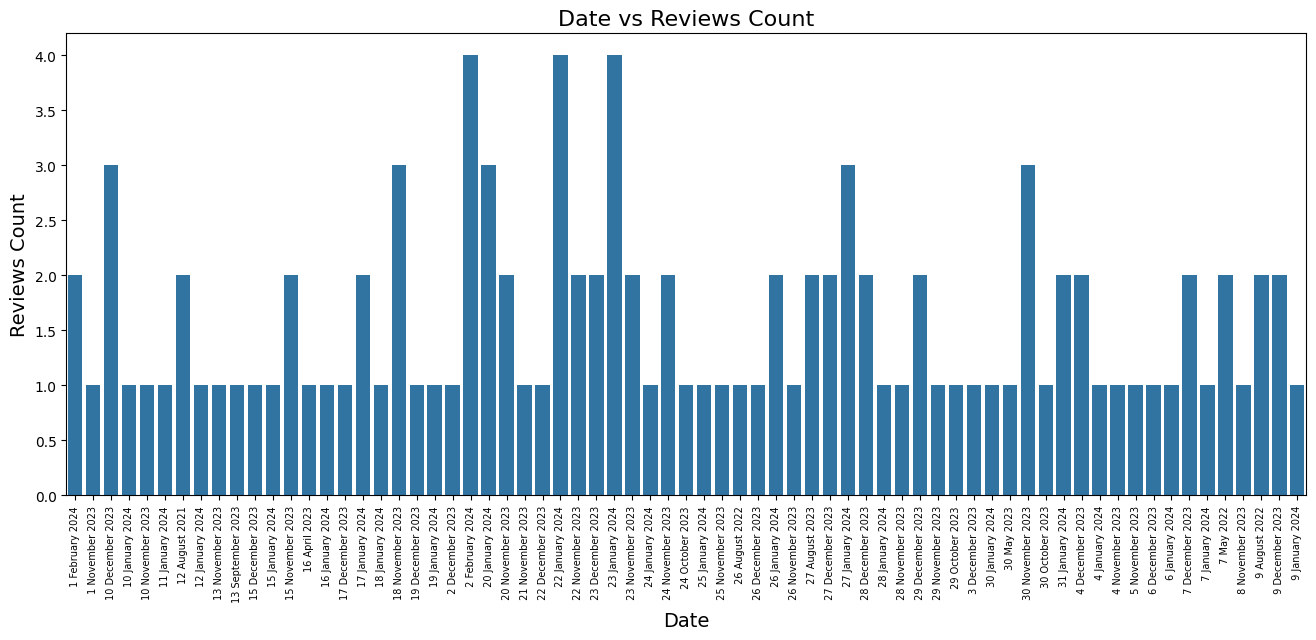

In [59]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

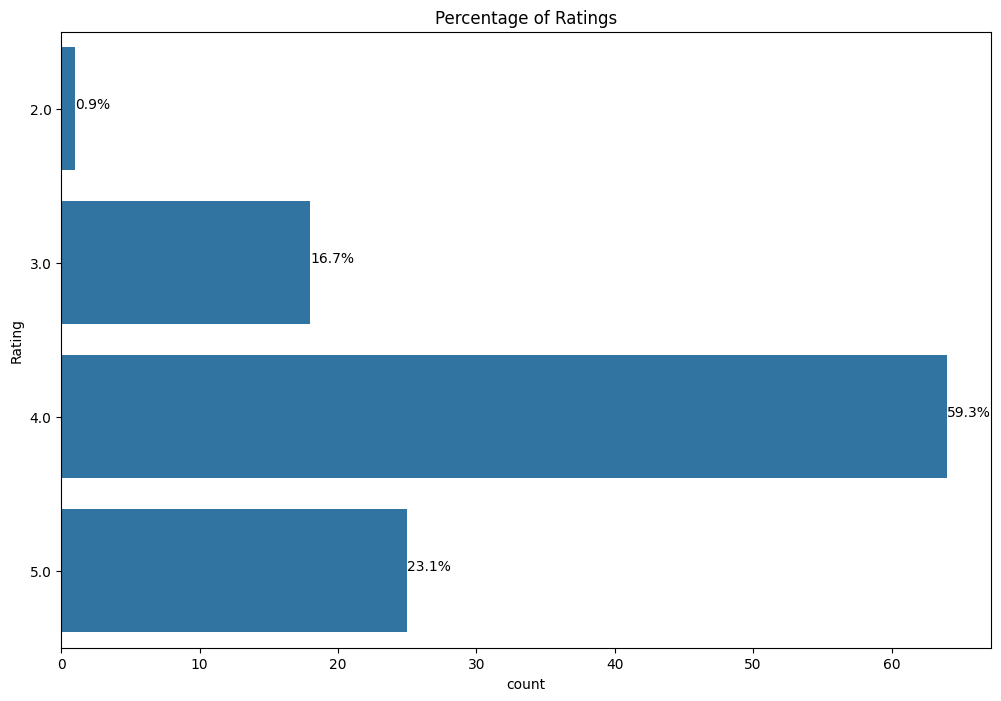

In [60]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [61]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    The media could not be loaded.\n              ...
1    His smart (model Coat extend plus) watch is sa...
2    It has a great quality and the built features ...
3                                         Vice product
4    I have received this product a couple of days ...
Name: Review, dtype: object

In [62]:
boat_review = reviews[['Review']]
boat_review

,Review
0,The media could not be loaded.\n ...
1,This smart (model Boat extend plus) watch is f...
2,It has a great quality and the built features ...
3,Nice product
4,I have received this product a couple of days ...
...,...
105,Changer cannot connects every time... It could...
106,Ok good but I not get prime video account
107,Good Product. value for money
108,beautiful very nice...missing body temperature...


In [63]:
boat_review.reset_index(drop=True, inplace=True)

In [64]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [65]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)